# Development: Single Tunnel Passing Protocol in PIBT

In [1]:
import sys
sys.path.append('../')

sys.path.append('../../')
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from panav.environment.env import MultiTunnelEnv,DefaultEmtpyEnv
from panav.hybrid import HybridGraph

from panav.viz import draw_env

import shapely

from panav.ORCA import Ordered_Agent

%load_ext autoreload
%autoreload 2

%load_ext snakeviz

In [88]:

bloating_r = 0.5
vmax = 1.0


results = []

env_name = "MultiTunnel"

# Current algorithm runs quickly under this config
# N = 20
# limits = [(-15,15),(-15,15)] 
# n_tunnel = 4

# Current algorithm runs slowly under this config
N = 10
n_tunnel = 2


env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*2.5, N_agent = N)

HG = HybridGraph(env,bloating_r)


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [89]:
to_remove = []
for e in HG.edges:
    if HG.edges[e]['type']=='soft':
        # HG.edges[e]['weight'] = 0
        # pass
        u,v = e
        if HG.nodes[u]['type']== HG.nodes[v]['type']=='tunnel' and \
                                HG.nodes[u]['open_space_id'] == HG.nodes[v]['open_space_id']:
           to_remove.append(e) # Remove the soft edges connecting two tunnel endpoints for this particular environment
for e in to_remove:
    HG.remove_edge(*e)


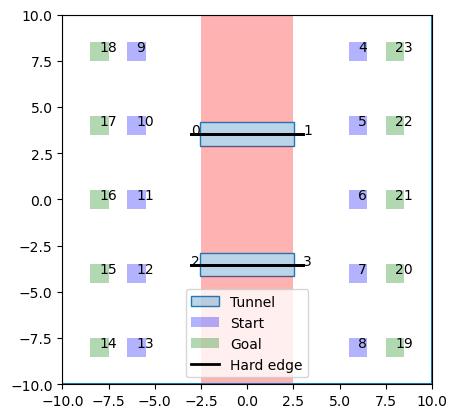

In [90]:
from panav.viz import draw_hybrid
draw_hybrid(HG)

In [91]:
from panav.PIBT import PIBT_plan
plans = PIBT_plan(HG,vmax,bloating_r,TIMEOUT=100,consider_entry=True)

[[4, 1, 0, 14], [5, 1, 0, 15], [6, 3, 2, 16], [7, 3, 2, 17], [8, 3, 2, 18], [9, 0, 1, 19], [10, 0, 1, 20], [11, 0, 1, 21], [12, 0, 1, 22], [13, 0, 1, 23]]
################# Time step 0 ################
################# Time step 1 ################
################# Time step 2 ################
################# Time step 3 ################
################# Time step 4 ################
################# Time step 5 ################
################# Time step 6 ################
################# Time step 7 ################
################# Time step 8 ################
################# Time step 9 ################
################# Time step 10 ################
################# Time step 11 ################
################# Time step 12 ################
################# Time step 13 ################
################# Time step 14 ################
Potential deadlock
################# Time step 15 ################
################# Time step 16 ################
Potential deadlock
#

In [92]:
from panav.viz import animation
from IPython.display import HTML, display

exec_tau = 1.0

dt = exec_tau * 0.25
agents = range(len(plans))
pos_to_ani = [np.array(plans[a][1]) for a in agents]
anim = animation(env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 